# SPARQL on van Gogh

We are going to use some the [DBPedia SPARQL endpoint](http://wiki.dbpedia.org/OnlineAccess#1.1%20Public%20SPARQL%20Endpoint) to do some queries related to _Vincent van Gogh_.

Note that DBPedia has a set of [predefined namespace prefixes](http://dbpedia.org/sparql?nsdecl) that we can use without the need to define them in the query.

First we define the endpoint and the preferred language for labels

In [1]:
%endpoint http://dbpedia.org/sparql
%lang en

# This is optional, it would increase the log level.
# The default logfile (unless changed upon kernel installation) is [TMPDIR]/sparqlkernel.log, 
# where [TMPDIR] is the platform default temporal directory
%log debug

Endpoint set to: http://dbpedia.org/sparql
Label preferred languages: [u'en']
Logging set to DEBUG

Now let's find out the entity URI for _van Gogh_ in DBPedia. We search entities that are persons and whose label contains `van Gogh` (case insensitive)

In [2]:
%format json
%display table 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT ?person ?name
WHERE {
    ?person a foaf:Person .
    ?person rdfs:label ?name
    FILTER regex(?name,"van gogh","i")
    FILTER langMatches(lang(?name),"en")
} LIMIT 20

Return format: JSON
Display: table

person,name
http://dbpedia.org/resource/Wil_van_Gogh,Wil van Gogh
http://dbpedia.org/resource/Vincent_van_Gogh,Vincent van Gogh
http://dbpedia.org/resource/Theo_van_Gogh_(art_dealer),Theo van Gogh (art dealer)
http://dbpedia.org/resource/Niels_van_Gogh,Niels van Gogh
http://dbpedia.org/resource/Natalie_van_Gogh,Natalie van Gogh
http://dbpedia.org/resource/Theo_van_Gogh_(film_director),Theo van Gogh (film director)
http://dbpedia.org/resource/Johanna_van_Gogh-Bonger,Johanna van Gogh-Bonger


It is clear from the result that we  want the <http://dbpedia.org/resource/Vincent_van_Gogh> DBPedia entity (we can click on the link for confirmation, and it will lead us to a DBPedia web page describing the resource).

## Fact finding

Now that we found his URI, let's search for places, dates and people related with van Gogh.

In this query we also set the table to show the data type for each result

In [3]:
%format json
%display table withtypes

# We might have more than one triple pointing to the same object, so we group by object
# and take one arbitrary predicate

SELECT (SAMPLE(?pred) AS ?prop) ?value
WHERE {

    # Places and dates
    {
        dbr:Vincent_van_Gogh ?pred ?value  .
        { ?pred rdfs:range xsd:date }
        UNION
        { ?pred rdfs:range dbo:Place }
    }
    # People van Gogh relates to
    UNION 
    { 
        dbr:Vincent_van_Gogh ?pred ?value  .
        ?value a foaf:Person 
    }
    # People related to van Gogh
    UNION 
    { 
        ?value ?pred dbr:Vincent_van_Gogh   .
        ?value a foaf:Person 
    }

} GROUP BY ?value ORDER BY ?prop


Return format: JSON
Display: table
Show Types: on

prop,type,value,type
http://dbpedia.org/ontology/birthDate,uri,1853-03-30,typed-literal
http://dbpedia.org/ontology/birthPlace,uri,http://dbpedia.org/resource/Zundert,uri
http://dbpedia.org/ontology/birthPlace,uri,http://dbpedia.org/resource/Netherlands,uri
http://dbpedia.org/ontology/deathDate,uri,1890-07-29,typed-literal
http://dbpedia.org/ontology/deathPlace,uri,http://dbpedia.org/resource/French_Third_Republic,uri
http://dbpedia.org/ontology/deathPlace,uri,http://dbpedia.org/resource/Auvers-sur-Oise,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Israel_Tsvaygenbaum,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Victor_Stabin,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Leo_Marchutz,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Annette_P._Jimerson,uri




## Find a painting
Now we search for a van Gogh painting whose title contains _"night"_

In [4]:
%format json
%display table 


PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Return format: JSON
Display: table

picture,name
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,Starry Night Over the Rhone
http://dbpedia.org/resource/Cafe_Terrace_at_Night,Cafe Terrace at Night
http://dbpedia.org/resource/The_Night_Café,The Night Café
http://dbpedia.org/resource/The_Starry_Night,The Starry Night
http://dbpedia.org/resource/White_House_at_Night,White House at Night


Just to show another option, we repeat the query but indicating `raw` display format

In [5]:
%display raw 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Display: raw

{u'head': {u'link': [], u'vars': [u'picture', u'name']},
 u'results': {u'bindings': [{u'name': {u'type': u'literal',
                                       u'value': u'Starry Night Over the Rhone',
                                       u'xml:lang': u'en'},
                             u'picture': {u'type': u'uri',
                                          u'value': u'http://dbpedia.org/resource/Starry_Night_Over_the_Rhone'}},
                            {u'name': {u'type': u'literal',
                                       u'value': u'Cafe Terrace at Night',
                                       u'xml:lang': u'en'},
                             u'picture': {u'type': u'uri',
                                          u'value': u'http://dbpedia.org/resource/Cafe_Terrace_at_Night'}},
                            {u'name': {u'type': u'literal',
                                       u'value': u'The Night Caf\xe9',
                                       u'xml:lang': u'en'},
                

## Describe a painting

Now we find out all that DBPedia knows about one of those paintings, _Starry Night Over the Rhone_

In [6]:
%format n3
%display table
%lang en
%show all

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
CONSTRUCT  { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone .
             dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 .
           }
WHERE {
    { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone }
    UNION
    { dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 }
    
    FILTER ( ?p1 != owl:sameAs && ?p2 != owl:sameAs)
}


Return format: N3
Display: table
Label preferred languages: [u'en']
Result maximum size: unlimited

subject,predicate,object
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/metricUnit,cm
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://xmlns.com/foaf/0.1/name,Starry Night over the Rhone
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/class/yago/PaintingsByVincentVanGogh
http://dbpedia.org/resource/Starry_Night_over_the_Rhone,http://dbpedia.org/ontology/wikiPageRedirects,http://dbpedia.org/resource/Starry_Night_Over_the_Rhone
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://purl.org/dc/terms/subject,http://dbpedia.org/resource/Category:Paintings_by_Vincent_van_Gogh
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2003/01/geo/wgs84_pos#SpatialThing
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/museum,http://dbpedia.org/resource/Musée_d'Orsay
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/imageFile,Starry Night Over the Rhone.jpg
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/catalogue,F474; JH1592
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/ontology/abstract,"Starry Night Over the Rhone (September 1888) is one of Vincent van Gogh's paintings of Arles at night time. It was painted at a spot on the bank of the Rhone River that was only a one or two-minute walk from the Yellow House on the Place Lamartine which Van Gogh was renting at the time. The night sky and the effects of light at night provided the subject for some of his more famous paintings, including Cafe Terrace at Night (painted earlier the same month) and the later canvas from Saint-Rémy, The Starry Night.A sketch of the painting is included in a letter van Gogh sent to his friend Eugène Boch on October 2, 1888.The painting was first exhibited in 1889 at the annual exhibition of the Société des Artistes Indépendants in Paris, together with the Irises. The latter was added by Theo, while Vincent had proposed one of his paintings from the public gardens in Arles, most probably the version now in the Phillips Collection."


Similar data could be obtained by asking the endpoint to `DESCRIBE` the resource. Let's do this, but for a twist let's ask a the kernel to draw a graph (for this to work, [Graphviz](http://www.graphviz.org/) should be installed in the system)

Return format: N3
Display: svg
Label preferred languages: [u'en']

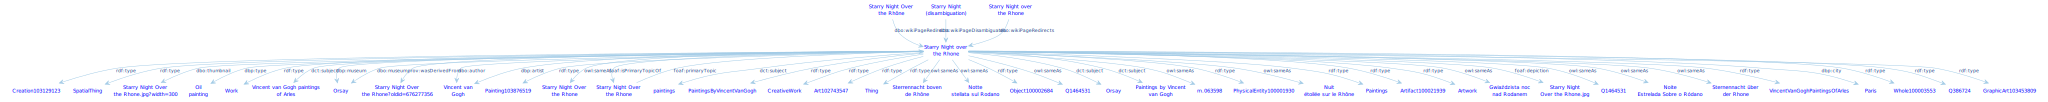

In [8]:
%format n3
%display diagram
%lang en

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
DESCRIBE  dbr:Starry_Night_Over_the_Rhone


## Locate paintings

Finally, to print out a graph slightly more complex, we will construct one with all of van Gogh's paintings, together with their location and the country they are in

Return format: N3
Display: svg

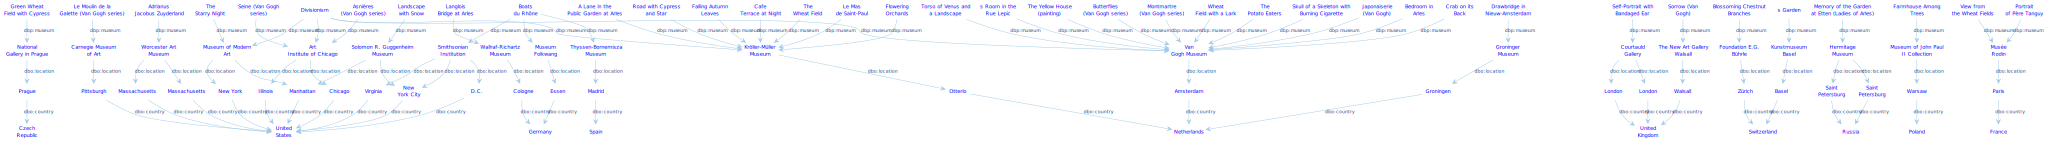

In [9]:
%format n3
%display diagram svg

PREFIX wd: <http://www.wikidata.org/entity/>
CONSTRUCT  { ?painting dbp:museum ?museum .
             ?painting dct:subject ?subject .
             ?museum dbo:location ?location .
             ?location dbo:country ?country .
           }
WHERE {
    ?painting dbp:artist dbr:Vincent_van_Gogh .
    ?painting a wd:Q386724 .
    ?painting a dbo:Artwork .
    ?painting dbp:museum ?museum .
    ?museum dbo:location ?location .
    ?location dbo:country ?country .
}